# Practice Lab: Neural Networks for Handwritten Digit Recognition, Binary
In this exercise, you will use a neural network to recognize the handwritten digits zero and one.

In [1]:
# Package
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [94]:
# Dataset
X, y = load_data()

In [5]:
print("The first element of X is: ", X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [7]:
print("The first element of y is: ", y[0, 0])
print("The last element of y is: ", y[-1, 0])

The first element of y is:  0
The last element of y is:  1


In [9]:
# Check dimensions of variables
print("The shape of X, y are: " + str(X.shape) + " " + str(y.shape))

The shape of X, y are: (1000, 400) (1000, 1)


In [ ]:
# Visualizing data
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

In [12]:
# Sequential model
model = Sequential(
    [
    tf.keras.Input(shape=(400,)),
    Dense(25, activation='sigmoid'),
    Dense(15, activation='sigmoid'),
    Dense(1, activation='sigmoid'),   
    ], name = "my_model"
)

In [13]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [15]:
from public_tests import *
test_c1(model)

All tests passed!


In [16]:
[layer1, layer2, layer3] = model.layers

In [17]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [18]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.3625756 ],
       [-0.04135275],
       [-0.5304808 ],
       [ 0.27510673],
       [ 0.3780539 ],
       [-0.5821636 ],
       [-0.58761054],
       [ 0.5881131 ],
       [ 0.38323063],
       [-0.52136713],
       [-0.28366762],
       [ 0.25405967],
       [ 0.405801  ],
       [ 0.56980413],
       [ 0.21345651]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [19]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.0001)
)
model.fit(
    X, y, epochs=20
)

Epoch 1/20
32/32 [==============================] - 5s 5ms/step - loss: 0.7150
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6733
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6375
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6070
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5790
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5536
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5292
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5057
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4830
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4611
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4397
Epoch 12/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4191
Epoch 13/20
32/32 [==============================

In [20]:
prediction = model.predict(X[0].reshape(1, 400)) # a zero
print(f"predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1, 400)) # a one
print(f"predicting a one: {prediction}")


1/1 [==============================] - 0s 162ms/step
predicting a zero: [[0.24720643]]
1/1 [==============================] - 0s 31ms/step
predicting a one: [[0.7780202]]


In [22]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


1/1 [==============================] - 0s 53ms/step


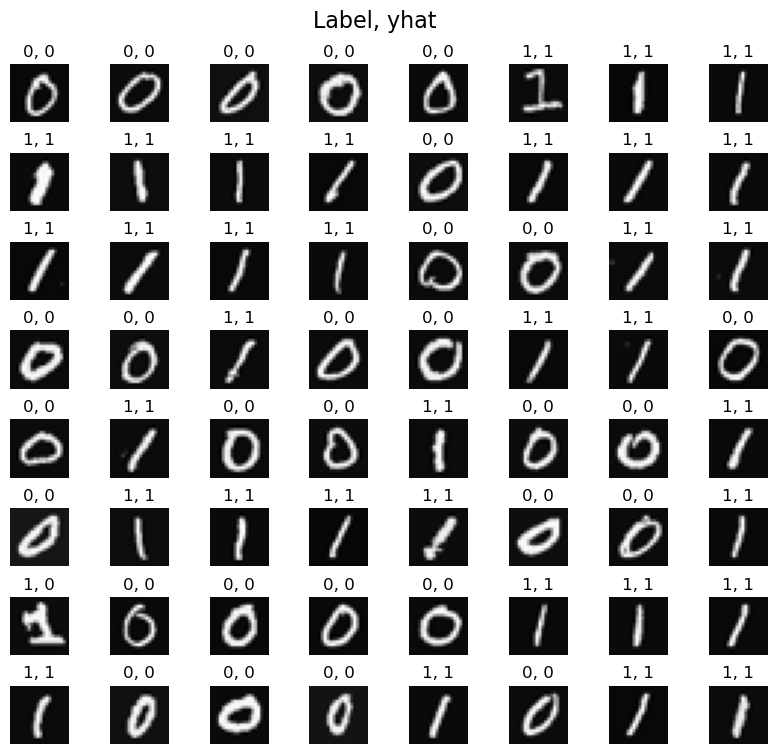

In [23]:
# compare the predictions and the labels

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1, 400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index, 0]}, {yhat}")
    ax.set_axis_off()
    
fig.suptitle("Label, yhat", fontsize = 16)
plt.show()

In [24]:
# Numpy Model implementation

In [25]:
def my_dense(a_in, W, b, g):
    units = W.shape[1]
    a_out = np.zeros(units)
    for i in range(units):
        w = W[:, i]
        z = np.dot(a_in, w) + b[i]
        a_out[i] = g(z)
    return(a_out)

In [26]:
# Quick check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [33]:
test_c2(my_dense)

All tests passed!


In [37]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)
    

In [38]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

In [39]:
#make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print("yhat = ",yhat, " label = ", y[0,0])

yhat =  0  label =  0


1/1 [==============================] - 0s 58ms/step


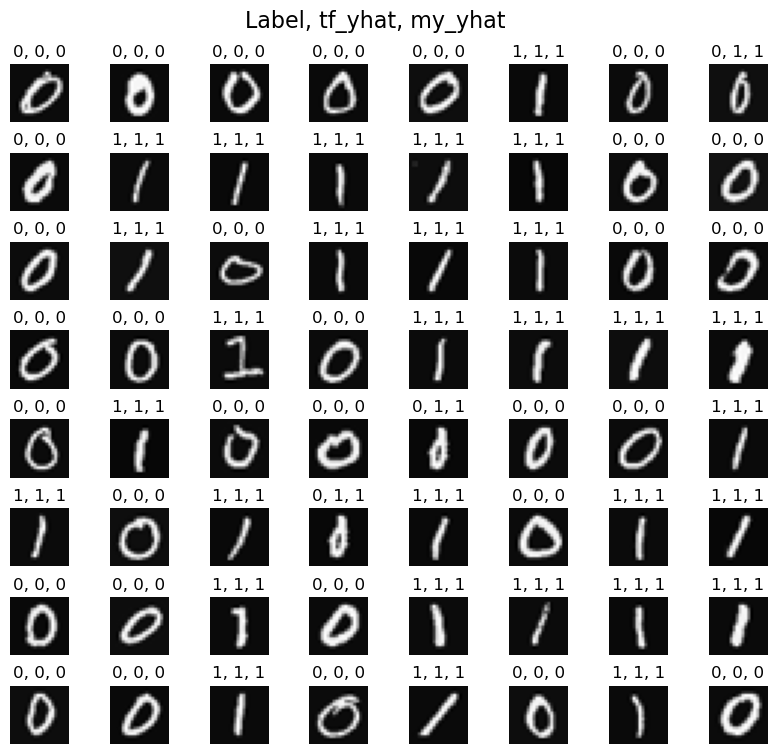

In [40]:
# compare the predictions and the labels

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using Numot model
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
    my_yhat = int(my_prediction >= 0.5)
    
    # Predict using the Neural Network
    tf_prediction = model.predict(X[random_index].reshape(1, 400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index, 0]}, {tf_yhat}, {my_yhat}")
    ax.set_axis_off()
    
fig.suptitle("Label, tf_yhat, my_yhat", fontsize = 16)
plt.show()

In [54]:
# Vectorization Numpy
z1 = np.matmul(X.T, W1) + b1
a1 = sigmoid(z1)
print(a1.shape)

(400, 1) (400, 25)
(1, 25)


In [84]:
def my_dense_v(A_in, W, b, g):
    A_out = g(np.matmul(A_in, W) + b)
    return A_out

In [85]:
# Quick check
x_tst = 0.1*np.arange(1,9,1).reshape(4,2)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3)
A_tst = my_dense_v(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

tf.Tensor(
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]], shape=(4, 3), dtype=float64)


In [86]:
test_c3(my_dense_v)

All tests passed!


In [87]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X, W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)    
    return A3

In [88]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

In [96]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
Prediction.shape

TensorShape([1000, 1])

In [95]:
Yhat = (prediction >= 0.5).numpy().astype(int)
print("predict a zero: ", Yhat[0], "predict a one: ", Yhat[5])

(1000, 400) (400, 25)
